# Stable Diffusion v2.1 using Optimum-Intel OpenVINO

![](https://github.com/openvinotoolkit/openvino_notebooks/assets/10940214/1858dae4-72fd-401e-b055-66d503d82446)

#### Table of contents:
- [Showing Info Available Devices](#Showing-Info-Available-Devices)
- [Download Pre-Converted Stable Diffusion 2.1 IR](#Download-Pre-Converted-Stable-Diffusion-2.1-IR)
- [Save the pre-trained models, Select the inference device and compile it](#Save-the-pre-trained-models,-Select-the-inference-device-and-compile-it)
- [Be creative, add the prompt and enjoy the result](#Be-creative,-add-the-prompt-and-enjoy-the-result)


Optimum Intel is the interface between the Transformers and Diffusers libraries and the different tools and libraries provided by Intel to accelerate end-to-end pipelines on Intel architectures. More details in this [repository](https://github.com/huggingface/optimum-intel#openvino). 

`Note: We suggest you to create a different environment and run the following installation command there.`

In [1]:
%pip install -q "optimum-intel[openvino,diffusers]@git+https://github.com/huggingface/optimum-intel.git" "ipywidgets" "transformers>=4.33" --extra-index-url https://download.pytorch.org/whl/cpu

Note: you may need to restart the kernel to use updated packages.


Stable Diffusion pipeline should brings 6 elements together, a text encoder model with a tokenizer, a UNet model with and scheduler, and an Autoencoder with Decoder and Encoder models. 

![image](https://github.com/openvinotoolkit/openvino_notebooks/assets/10940214/e166f225-1220-44aa-a987-84471e03947d)


The base model used for this example is the [`stabilityai/stable-diffusion-2-1-base`](https://huggingface.co/stabilityai/stable-diffusion-2-1). This model was converted to OpenVINO format, for accelerated inference on CPU or Intel GPU with OpenVINO's integration into Optimum: `optimum-intel`. The model weights are stored with FP16 precision, which reduces the size of the model by half. You can find the model used in this notebook is [`helenai/stabilityai-stable-diffusion-2-1-base-ov`](https://huggingface.co/helenai/stabilityai-stable-diffusion-2-1-base-ov). Let's download the pre-converted model Stable Diffusion 2.1 [Intermediate Representation Format (IR)](https://docs.openvino.ai/2022.3/openvino_docs_MO_DG_IR_and_opsets.html)

### Showing Info Available Devices
[back to top ⬆️](#Table-of-contents:)

The `available_devices` property shows the available devices in your system. The "FULL_DEVICE_NAME" option to `ie.get_property()` shows the name of the device. Check what is the ID name for the discrete GPU, if you have integrated GPU (iGPU) and discrete GPU (dGPU), it will show `device_name="GPU.0"` for iGPU and `device_name="GPU.1"` for dGPU. If you just have either an iGPU or dGPU that will be assigned to `"GPU"`

Note: For more details about GPU with OpenVINO visit this [link](https://docs.openvino.ai/nightly/openvino_docs_install_guides_configurations_for_intel_gpu.html). If you have been facing any issue in Ubuntu 20.04 or Windows 11 read this [blog](https://blog.openvino.ai/blog-posts/install-gpu-drivers-windows-ubuntu).

In [2]:
from openvino.runtime import Core

ie = Core()
devices = ie.available_devices

for device in devices:
    device_name = ie.get_property(device, "FULL_DEVICE_NAME")
    print(f"{device}: {device_name}")

CPU: 13th Gen Intel(R) Core(TM) i9-13900K
GPU.0: Intel(R) UHD Graphics 770 (iGPU)
GPU.1: Intel(R) Arc(TM) A770 Graphics (dGPU)


### Download Pre-Converted Stable Diffusion 2.1 IR
[back to top ⬆️](#Table-of-contents:)


In [3]:
from optimum.intel.openvino import OVStableDiffusionPipeline
# download the pre-converted SD v2.1 model from Hugging Face Hub
name = "helenai/stabilityai-stable-diffusion-2-1-base-ov"

pipe = OVStableDiffusionPipeline.from_pretrained(name, compile=False)
pipe.reshape(batch_size=1, height=512, width=512, num_images_per_prompt=1)

2023-07-03 11:16:29.469651: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-03 11:16:29.507431: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 11:16:30.127586: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


INFO:nncf:NNCF initialized successfully. Supported frameworks detected: torch, tensorflow, onnx, openvino


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
/home/ea/work/notebooks_convert/notebooks_conv_env/lib/python3.8/site-packages/diffusers/models/cross_attention.py:30: FutureWarning: Importing from cross_attention is deprecated. Please import from diffusers.models.attention_processor instead.
  deprecate(
comet_ml is installed but `COMET_API_KEY` is not set.
The config attributes {'requires_safety_checker': False, 'safety_checker': [None, None]} were passed to OVStableDiffusionPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

/home/ea/work/notebooks_convert/notebooks_conv_env/lib/python3.8/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


OVStableDiffusionPipeline {
  "_class_name": "OVStableDiffusionPipeline",
  "_diffusers_version": "0.16.1",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "optimum",
    "OVModelTextEncoder"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "optimum",
    "OVModelUnet"
  ],
  "vae_decoder": [
    "optimum",
    "OVModelVaeDecoder"
  ],
  "vae_encoder": [
    null,
    null
  ]
}

### Save the pre-trained models, Select the inference device and compile it
[back to top ⬆️](#Table-of-contents:)

You can save the model locally in order to avoid downloading process later. The model will also saved in the cache.

In [5]:
# pipe.save_pretrained("./openvino_ir") # Uncomment if you need the model for further compilations
pipe.to("GPU")
pipe.compile()

Compiling the text_encoder...
Compiling the vae_decoder...
Compiling the unet...


### Be creative, add the prompt and enjoy the result
[back to top ⬆️](#Table-of-contents:)


  0%|          | 0/18 [00:00<?, ?it/s]

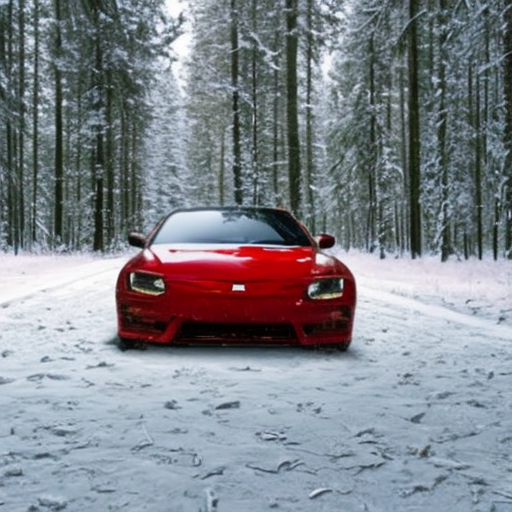

In [6]:
import gc

# Generate an image. 
prompt = "red car in snowy forest, epic vista, beautiful landscape, 4k, 8k"
output = pipe(prompt, num_inference_steps=17, output_type="pil").images[0]
output.save("image.png")
output

In [ ]:
del pipe
gc.collect()